# Random walks

Short function definition (one-liner):

In [3]:
jump() = rand( (-1, +1) )

jump (generic function with 1 method)

Exactly the same:

In [4]:
function jump()
    return rand( (-1, +1) )
end 

jump (generic function with 1 method)

In [5]:
jump

jump (generic function with 1 method)

In [6]:
jump()

1

In [7]:
rand( [-1, +1] )

1

In [8]:
t = (-1, +1)

(-1, 1)

In [9]:
typeof(t)

Tuple{Int64,Int64}

In [10]:
t[1] = 10

MethodError: MethodError: no method matching setindex!(::Tuple{Int64,Int64}, ::Int64, ::Int64)

Side remark: Simple bernoulli function:

In [11]:
bernoulli(p) = rand() < p

bernoulli (generic function with 1 method)

In [12]:
bernoulli(0.25)

false

In [13]:
jump()

-1

## Random walks

In [14]:
[jump() for i in 1:10]

10-element Array{Int64,1}:
  1
 -1
  1
  1
  1
  1
 -1
  1
 -1
  1

In [15]:
function walk(n)
    x = 0
    
    for i in 1:n
        x += jump()   # x = x + jump()
    end
    
    return x
end

walk (generic function with 1 method)

In [16]:
walk(10)

2

In [17]:
function trajectory(n)
    x = 0
    
    xs = [x]
    
    for i in 1:n
        x += jump()   # x = x + jump()
    end
    
    return x
end

trajectory (generic function with 1 method)

In [18]:
v = []

0-element Array{Any,1}

In [19]:
push!(v, 10)

1-element Array{Any,1}:
 10

In [20]:
v

1-element Array{Any,1}:
 10

In [21]:
push!(v, "hellohellohellohellohellohello", 20)

3-element Array{Any,1}:
 10
   "hellohellohellohellohellohello"
 20

In [22]:
v = Int64[]

0-element Array{Int64,1}

In [23]:
push!(v, 10)

1-element Array{Int64,1}:
 10

In [24]:
push!(v, "hello")

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [25]:
function trajectory(n)
    x = 0
    
    xs = [x]  # try to initialize array with an initial value; 
                # determines the element type of array  
    for i in 1:n
        x += jump()   # x = x + jump()
        
        push!(xs, x)
    end
    
    return xs
end

trajectory (generic function with 1 method)

In [26]:
v = [10]

1-element Array{Int64,1}:
 10

In [27]:
traj = trajectory(100);

## Plotting

In [28]:
plot(traj)

UndefVarError: UndefVarError: plot not defined

In [29]:
using Plots

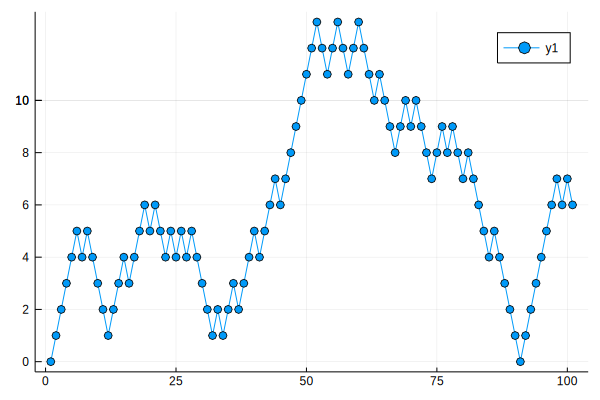

In [30]:
traj = trajectory(100);
plot(traj, m=:o)

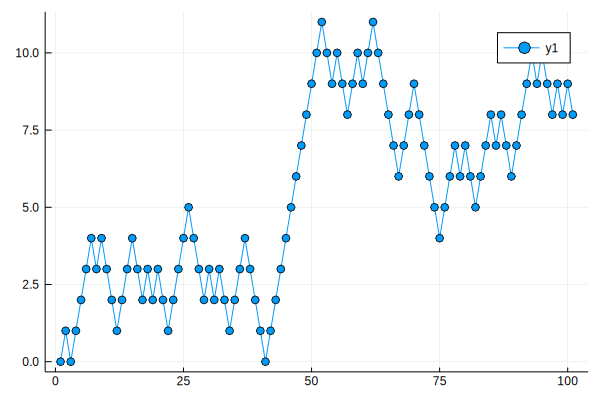

In [31]:
traj = trajectory(100);
plot(traj, m=:o)

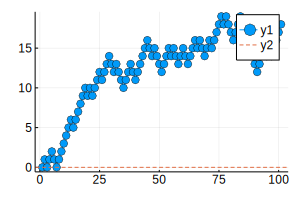

In [32]:
traj = trajectory(100);
plot(traj, m=:o, size=(300, 200))

hline!([0], ls=:dash)  # ! functions add to the existing plot

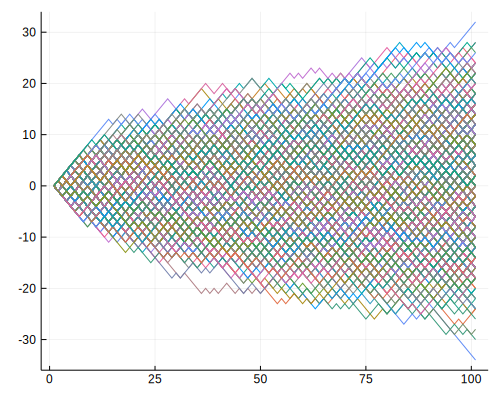

In [38]:
num_walkers = 1000
num_steps = 100

p = plot(size=(500, 400), leg=false)

for i in 1:num_walkers
    traj = trajectory(num_steps)
    
    plot!(traj)
end

p

In [40]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7206566566347119662\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11527514353256085112\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7206566566347119662\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [41]:
@manipulate for n in 1:20
    traj = trajectory(n)
    
    plot(traj)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/cdOnS/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000138e0db10, Task (runnable) @0x0000000138e0db10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4860698096510693037\",\"id\":\"ob_02\

## Precompute the data

In [45]:
n = 20
traj = trajectory(n)

@manipulate for i in slider(1:n, value=1)
    plot(traj[1:i])   # plot up to time i
    xlims!(0, length(traj))
    ylims!(minimum(traj), maximum(traj))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/cdOnS/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001436a3190, Task (runnable) @0x00000001436a3190), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4257098892043784501\",\"id\":\"ob_

## Run N walkers simultaneously

In [46]:
n = 20

traj_1 = trajectory(n)
traj_2 = trajectory(n)
traj_3 = trajectory(n)

21-element Array{Int64,1}:
  0
  1
  0
  1
  0
  1
  0
  1
  0
 -1
 -2
 -1
 -2
 -1
 -2
 -3
 -4
 -3
 -2
 -1
  0

Rule: NEVER copy and paste (except occasionally)

Instead: Automate!

In [47]:
n = 20

traj = [trajectory(n)]

1-element Array{Array{Int64,1},1}:
 [0, -1, -2, -1, -2, -3, -4, -3, -4, -5  …  -3, -2, -3, -2, -1, -2, -1, -2, -3, -4]

In [48]:
push!(traj, trajectory(n))

2-element Array{Array{Int64,1},1}:
 [0, -1, -2, -1, -2, -3, -4, -3, -4, -5  …  -3, -2, -3, -2, -1, -2, -1, -2, -3, -4]
 [0, 1, 2, 3, 4, 3, 4, 5, 6, 7  …  5, 4, 5, 4, 3, 4, 3, 2, 3, 2]

In [49]:
traj[1]

21-element Array{Int64,1}:
  0
 -1
 -2
 -1
 -2
 -3
 -4
 -3
 -4
 -5
 -4
 -3
 -2
 -3
 -2
 -1
 -2
 -1
 -2
 -3
 -4

In [50]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.

---

```
push!(q::Deque{T}, x)
```

Add an element to the back

---

```
push!(s::IntDisjointSets{T})
```

Make a new subset with an automatically chosen new element x. Returns the new element. Throw an `ArgumentError` if the capacity of the set would be exceeded.

---

```
push!(s::DisjointSets{T}, x::T)
```

Make a new subset with an automatically chosen new element x. Returns the new element.

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb::CircularBuffer, data)
```

Add an element to the back and overwrite front if full.


In [51]:
v = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [52]:
push!(v, 4)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [53]:
push!(v, push!(v, [4, 5])4, 5)

6-element Array{Int64,1}:
 1
 2
 3
 4
 4
 5

In [54]:
push!(v, [4, 5])

MethodError: MethodError: Cannot `convert` an object of type Array{Int64,1} to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [55]:
append!(v, [4, 5])

8-element Array{Int64,1}:
 1
 2
 3
 4
 4
 5
 4
 5

In [56]:
traj

2-element Array{Array{Int64,1},1}:
 [0, -1, -2, -1, -2, -3, -4, -3, -4, -5  …  -3, -2, -3, -2, -1, -2, -1, -2, -3, -4]
 [0, 1, 2, 3, 4, 3, 4, 5, 6, 7  …  5, 4, 5, 4, 3, 4, 3, 2, 3, 2]

In [57]:
push!(traj, trajectory(n))

3-element Array{Array{Int64,1},1}:
 [0, -1, -2, -1, -2, -3, -4, -3, -4, -5  …  -3, -2, -3, -2, -1, -2, -1, -2, -3, -4]
 [0, 1, 2, 3, 4, 3, 4, 5, 6, 7  …  5, 4, 5, 4, 3, 4, 3, 2, 3, 2]
 [0, 1, 2, 1, 0, 1, 2, 1, 0, 1  …  3, 2, 3, 4, 3, 2, 1, 2, 1, 2]

In [59]:
walkers = [trajectory(n) for i in 1:10]

10-element Array{Array{Int64,1},1}:
 [0, 1, 2, 1, 0, -1, 0, -1, -2, -1  …  1, 0, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, 1, 2, 3, 4, 3, 4, 5  …  3, 2, 3, 2, 3, 4, 3, 2, 1, 2]
 [0, -1, -2, -1, 0, -1, 0, 1, 2, 1  …  1, 2, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, -1, -2, -1, -2, -3, -4, -5  …  -7, -6, -7, -6, -7, -8, -9, -10, -11, -10]
 [0, 1, 0, -1, 0, 1, 2, 3, 4, 5  …  5, 4, 5, 4, 3, 4, 5, 6, 7, 8]
 [0, 1, 0, 1, 2, 3, 4, 3, 2, 3  …  3, 2, 1, 0, 1, 0, -1, 0, -1, 0]
 [0, 1, 2, 1, 0, 1, 2, 3, 4, 3  …  3, 4, 3, 2, 1, 2, 1, 2, 3, 2]
 [0, 1, 2, 3, 2, 1, 2, 3, 4, 3  …  5, 4, 3, 2, 3, 4, 3, 4, 5, 4]
 [0, 1, 0, 1, 2, 3, 2, 3, 2, 3  …  3, 2, 1, 0, -1, -2, -3, -4, -3, -4]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  1, 2, 1, 2, 3, 4, 5, 4, 3, 4]

In [61]:
n

20

In [68]:
single_traj = trajectory(n);

In [71]:
length(single_traj)

21

In [69]:
# single_traj[n]

-3

In [70]:
single_traj[end]

-4

In a Markdown cell, backticks: `x = 3`

In [73]:
i = 10

[ traj[i] for traj in walkers ]  # iterating through `walkers`, which
                                # is a `Vector` of `Vector`s

10-element Array{Int64,1}:
 -1
  5
  1
 -5
  5
  3
  3
  3
  3
  3

In [74]:
walkers

10-element Array{Array{Int64,1},1}:
 [0, 1, 2, 1, 0, -1, 0, -1, -2, -1  …  1, 0, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, 1, 2, 3, 4, 3, 4, 5  …  3, 2, 3, 2, 3, 4, 3, 2, 1, 2]
 [0, -1, -2, -1, 0, -1, 0, 1, 2, 1  …  1, 2, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, -1, -2, -1, -2, -3, -4, -5  …  -7, -6, -7, -6, -7, -8, -9, -10, -11, -10]
 [0, 1, 0, -1, 0, 1, 2, 3, 4, 5  …  5, 4, 5, 4, 3, 4, 5, 6, 7, 8]
 [0, 1, 0, 1, 2, 3, 4, 3, 2, 3  …  3, 2, 1, 0, 1, 0, -1, 0, -1, 0]
 [0, 1, 2, 1, 0, 1, 2, 3, 4, 3  …  3, 4, 3, 2, 1, 2, 1, 2, 3, 2]
 [0, 1, 2, 3, 2, 1, 2, 3, 4, 3  …  5, 4, 3, 2, 3, 4, 3, 4, 5, 4]
 [0, 1, 0, 1, 2, 3, 2, 3, 2, 3  …  3, 2, 1, 0, -1, -2, -3, -4, -3, -4]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  1, 2, 1, 2, 3, 4, 5, 4, 3, 4]

Convert Vector of Vectors into a matrix:

In [75]:
hcat(walkers[1], walkers[2])

21×2 Array{Int64,2}:
  0   0
  1  -1
  2   0
  1   1
  0   2
 -1   3
  0   4
 -1   3
 -2   4
 -1   5
  0   4
  1   3
  0   2
  1   3
  0   2
 -1   3
 -2   4
 -1   3
  0   2
 -1   1
 -2   2

In [76]:
hcat(walkers)  # wrong

10×1 Array{Array{Int64,1},2}:
 [0, 1, 2, 1, 0, -1, 0, -1, -2, -1  …  1, 0, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, 1, 2, 3, 4, 3, 4, 5  …  3, 2, 3, 2, 3, 4, 3, 2, 1, 2]
 [0, -1, -2, -1, 0, -1, 0, 1, 2, 1  …  1, 2, 1, 0, -1, -2, -1, 0, -1, -2]
 [0, -1, 0, -1, -2, -1, -2, -3, -4, -5  …  -7, -6, -7, -6, -7, -8, -9, -10, -11, -10]
 [0, 1, 0, -1, 0, 1, 2, 3, 4, 5  …  5, 4, 5, 4, 3, 4, 5, 6, 7, 8]
 [0, 1, 0, 1, 2, 3, 4, 3, 2, 3  …  3, 2, 1, 0, 1, 0, -1, 0, -1, 0]
 [0, 1, 2, 1, 0, 1, 2, 3, 4, 3  …  3, 4, 3, 2, 1, 2, 1, 2, 3, 2]
 [0, 1, 2, 3, 2, 1, 2, 3, 4, 3  …  5, 4, 3, 2, 3, 4, 3, 4, 5, 4]
 [0, 1, 0, 1, 2, 3, 2, 3, 2, 3  …  3, 2, 1, 0, -1, -2, -3, -4, -3, -4]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  1, 2, 1, 2, 3, 4, 5, 4, 3, 4]

In [77]:
hcat(walkers...)  # "splat" # equiv to hcat(walkers[1], ..., walkers[10])  

21×10 Array{Int64,2}:
  0   0   0    0   0   0  0  0   0  0
  1  -1  -1   -1   1   1  1  1   1  1
  2   0  -2    0   0   0  2  2   0  2
  1   1  -1   -1  -1   1  1  3   1  3
  0   2   0   -2   0   2  0  2   2  4
 -1   3  -1   -1   1   3  1  1   3  3
  0   4   0   -2   2   4  2  2   2  2
 -1   3   1   -3   3   3  3  3   3  1
 -2   4   2   -4   4   2  4  4   2  2
 -1   5   1   -5   5   3  3  3   3  3
  0   4   2   -6   4   4  4  4   2  2
  1   3   1   -7   5   3  3  5   3  1
  0   2   2   -6   4   2  4  4   2  2
  1   3   1   -7   5   1  3  3   1  1
  0   2   0   -6   4   0  2  2   0  2
 -1   3  -1   -7   3   1  1  3  -1  3
 -2   4  -2   -8   4   0  2  4  -2  4
 -1   3  -1   -9   5  -1  1  3  -3  5
  0   2   0  -10   6   0  2  4  -4  4
 -1   1  -1  -11   7  -1  3  5  -3  3
 -2   2  -2  -10   8   0  2  4  -4  4

In [79]:
walkers_matrix = reduce(hcat, walkers)  # more efficient when have a lot of vectors

21×10 Array{Int64,2}:
  0   0   0    0   0   0  0  0   0  0
  1  -1  -1   -1   1   1  1  1   1  1
  2   0  -2    0   0   0  2  2   0  2
  1   1  -1   -1  -1   1  1  3   1  3
  0   2   0   -2   0   2  0  2   2  4
 -1   3  -1   -1   1   3  1  1   3  3
  0   4   0   -2   2   4  2  2   2  2
 -1   3   1   -3   3   3  3  3   3  1
 -2   4   2   -4   4   2  4  4   2  2
 -1   5   1   -5   5   3  3  3   3  3
  0   4   2   -6   4   4  4  4   2  2
  1   3   1   -7   5   3  3  5   3  1
  0   2   2   -6   4   2  4  4   2  2
  1   3   1   -7   5   1  3  3   1  1
  0   2   0   -6   4   0  2  2   0  2
 -1   3  -1   -7   3   1  1  3  -1  3
 -2   4  -2   -8   4   0  2  4  -2  4
 -1   3  -1   -9   5  -1  1  3  -3  5
  0   2   0  -10   6   0  2  4  -4  4
 -1   1  -1  -11   7  -1  3  5  -3  3
 -2   2  -2  -10   8   0  2  4  -4  4

In [80]:
walkers_matrix[1, end]  # last element of first row

0

In [81]:
walkers_matrix[1:2, end]  # last element of first and second rows

2-element Array{Int64,1}:
 0
 1

In [83]:
walkers_matrix[1:end, end]  # last element of all rows

21-element Array{Int64,1}:
 0
 1
 2
 3
 4
 3
 2
 1
 2
 3
 2
 1
 2
 1
 2
 3
 4
 5
 4
 3
 4

In [85]:
final_positions = walkers_matrix[:, end]  # last element of first and second rows

21-element Array{Int64,1}:
 0
 1
 2
 3
 4
 3
 2
 1
 2
 3
 2
 1
 2
 1
 2
 3
 4
 5
 4
 3
 4

In [86]:
walkers_matrix[end]

4

## Where are the walkers at last time step?

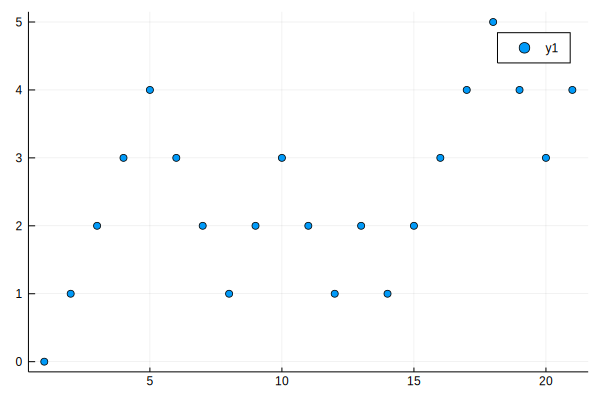

In [87]:
walkers = []

scatter(final_positions)

In [92]:
n = 20

walkers = [trajectory(n) for i in 1:1000]

final_positions = [traj[end] for traj in walkers];

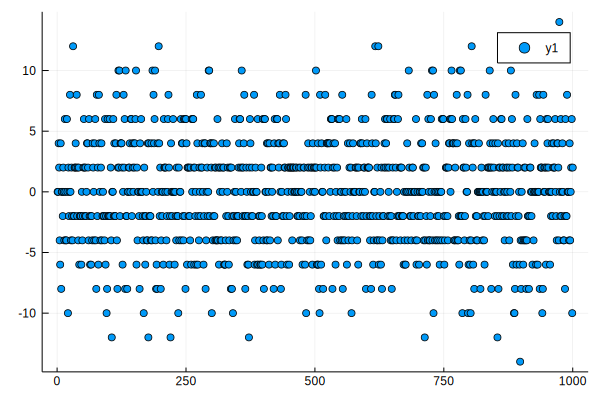

In [93]:
scatter(final_positions)

In [94]:
using StatsBase  # do have to install

In [96]:
counts = countmap(final_positions)

Dict{Int64,Int64} with 15 entries:
  2   => 171
  0   => 166
  -4  => 123
  10  => 18
  8   => 32
  6   => 78
  -6  => 73
  4   => 105
  -8  => 37
  -10 => 17
  14  => 1
  -12 => 6
  -2  => 166
  -14 => 1
  12  => 6

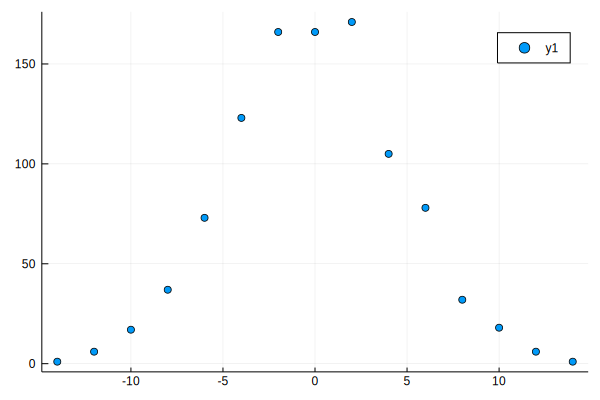

In [97]:
scatter(counts)

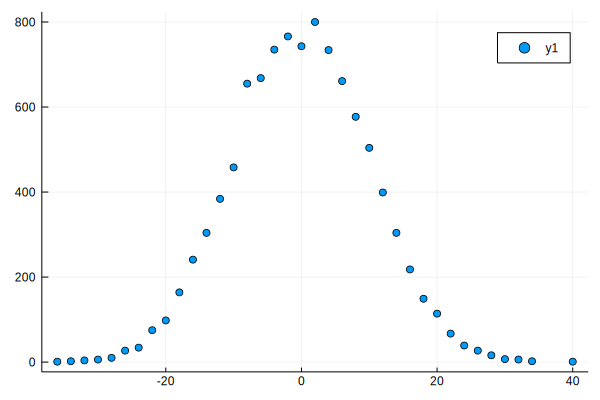

In [104]:
n = 100

num_walkers = 10_000

walkers = [trajectory(n) for i in 1:num_walkers]

final_positions = [traj[end] for traj in walkers];

counts = countmap(final_positions)

scatter(counts)

In [ ]:
countmap()